In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import missingno as msno

import warnings

In [4]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
sns.set(font_scale=2.5)
warnings.filterwarnings('ignore')

# 앞으로 해야 할 과정

1. 데이터셋 확인

2. 탐색적 데이터 분석(exploratory data analysis)

3. feature engineering

4. 모델 만들기

5. 모델 학습 및 예측

6. 모델 평가

# Dataset 확인

- 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰는 라이브러리는 pandas 이다.

- pandas를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있다.

- 데이터 과학 대회에서 데이터셋은 보통 train set, test set으로 나뉘어 있다.

In [5]:
df_train = pd.read_csv('../input/dankook/train.csv', index_col=0)
df_test = pd.read_csv('../input/dankook/test.csv', index_col=0)

In [6]:
df_train.head()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


- 여기서 다루는 문제에서 feature는 u, g, r, i, z ,redshift, dered_u, dered_g, dered_r, dered_i, dered_z, nObserve, nDetect ,airmass_u, airmass_g, airmass_r, airmass_i, airmass_z 이다.

- 그리고 예측하려는 target label은 class 이다.

- 변수에 대한 자세한 설명은 해당 링크 (http://sdss.china-vo.org/skyserver/en/help/docs/QS_UserGuide.aspx) 참고

|변수(feature variable)|정의|설명|타입|
|:--:|:--:|:--:|:--:|
|u|자외선|continuous|float|
|g|가시광선(초록)|continuous|float|
|r|가시광선(빨강)|continuous|float|
|i|근 적외선|continuous|float|
|z|적외선|continuous|float|
|redshift|적색편이|continuous|float|
|dered_u|천체의 광도(자외선에 해당하는)|continuous|float|
|dered_g|천체의 광도(가시광선 초록에 해당하는)|continuous|float|
|dered_r|천체의 광도(가시광선 빨강에 해당하는)|continuous|float|
|dered_i|천체의 광도(근 적외선에 해당하는)|continuous|float|
|dered_z|천체의 광도(적외선에 해당하는)|continuous|float|
|nObserve|관측된수|discrete|int|
|nDetect|탐지된수|discrete|int|
|airmass_u|u-band 관측시 공기질량|continuous|float|
|airmass_g|g-band 관측시 공기질량|continuous|float|
|airmass_r|r-band 관측시 공기질량|continuous|float|
|airmass_i|i-band 관측시 공기질량|continuous|float|
|airmass_z|z-band 관측시 공기질량|continuous|float|

## Target label 확인

- target label이 어떤 distribution을 가지고 있는지 확인해봐야 합니다.

- binary classification 문제의 경우에서, 1 과 0의 분호가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

- Multi-class classification에 대해서는 잘 모름. 공부 부족

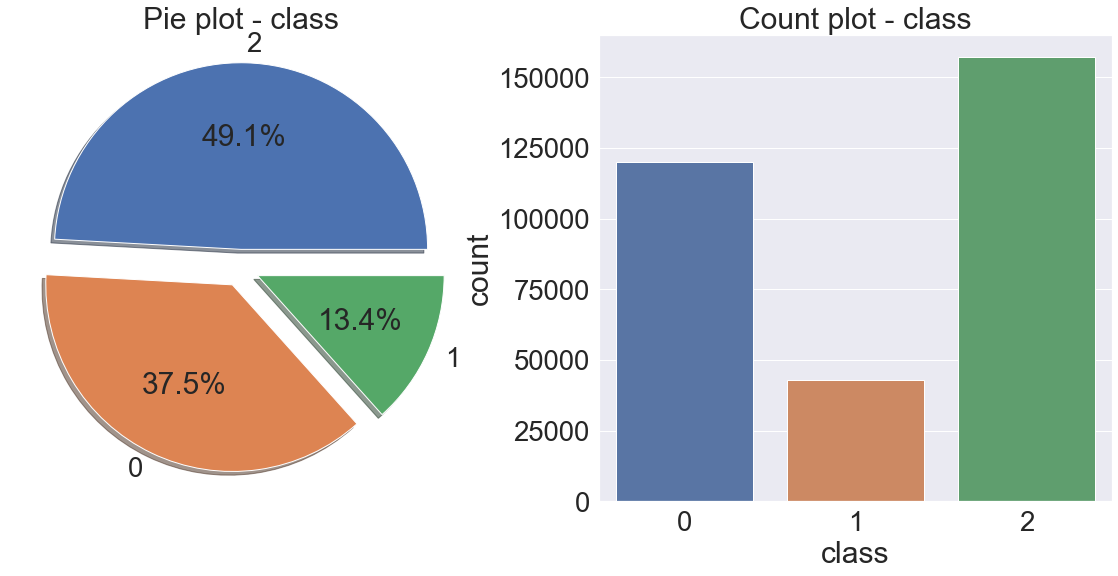

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['class'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - class')
ax[0].set_ylabel('')

sns.countplot('class', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - class')

plt.show()

# Exploratory data analysis

- 이제 본격적으로 데이터 분석을 해보자. 데이터는 매우 많다. 이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요하다.

- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편하다.

In [8]:
## 학습 데이터 시각화

In [9]:
train_sample = df_train.sample(n=10000, random_state=2020)

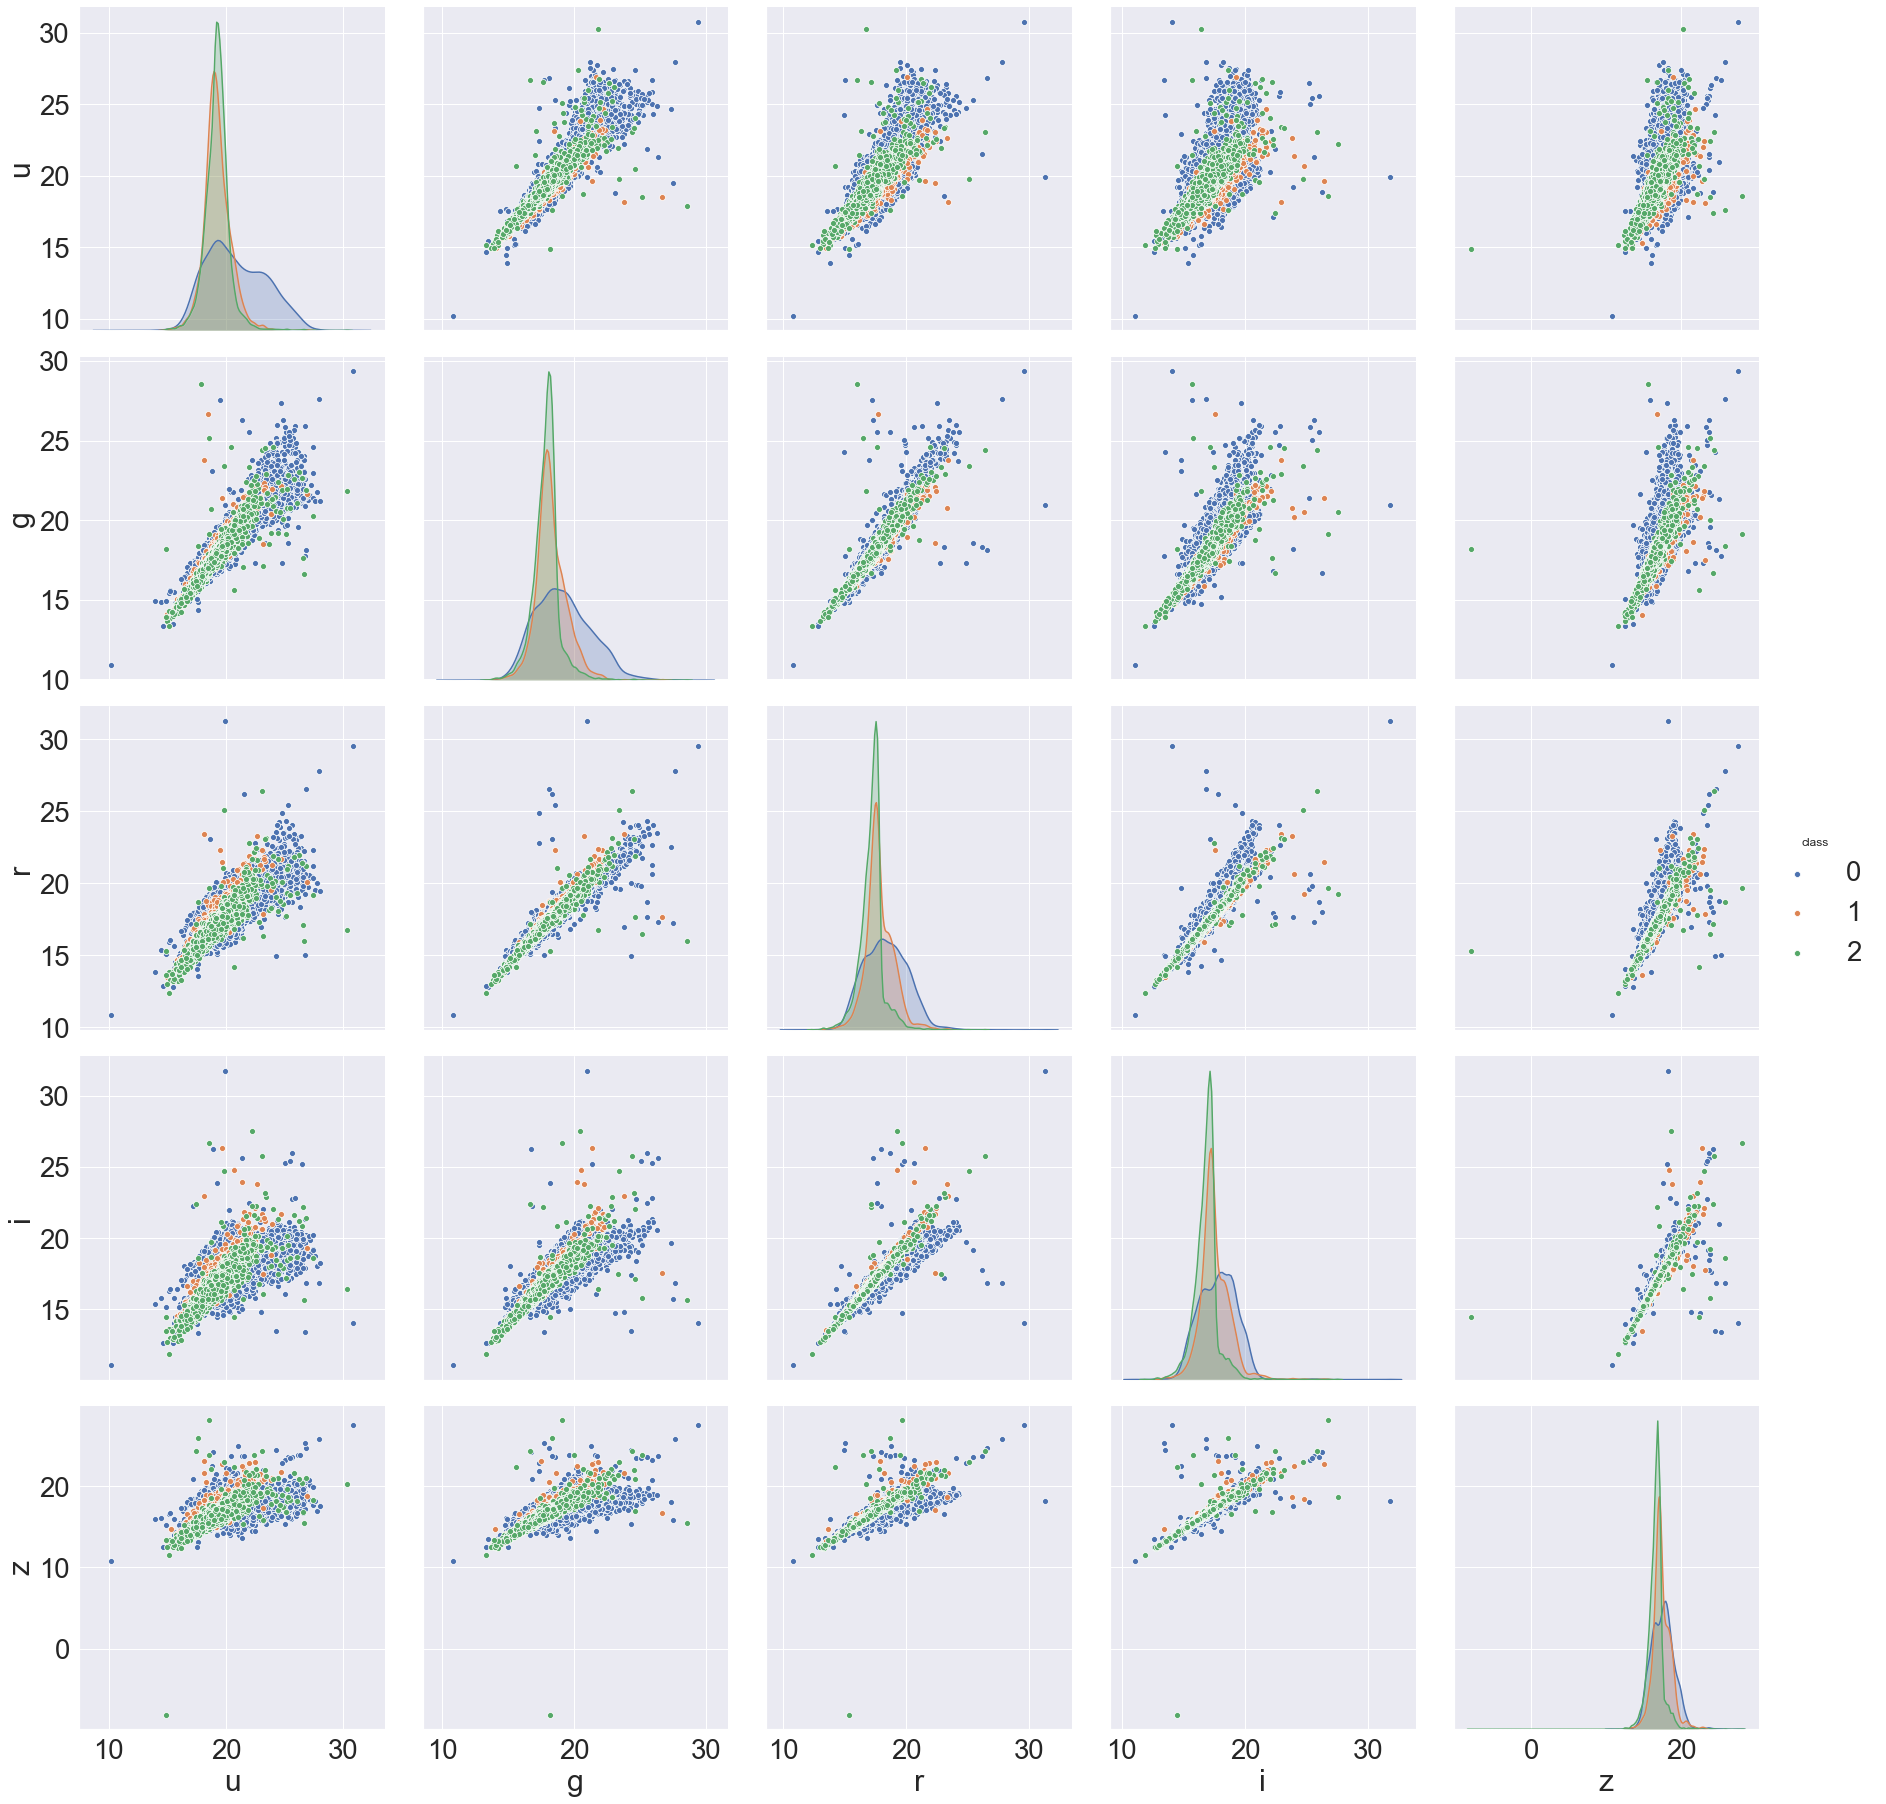

In [10]:
sns.pairplot(data=train_sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5)

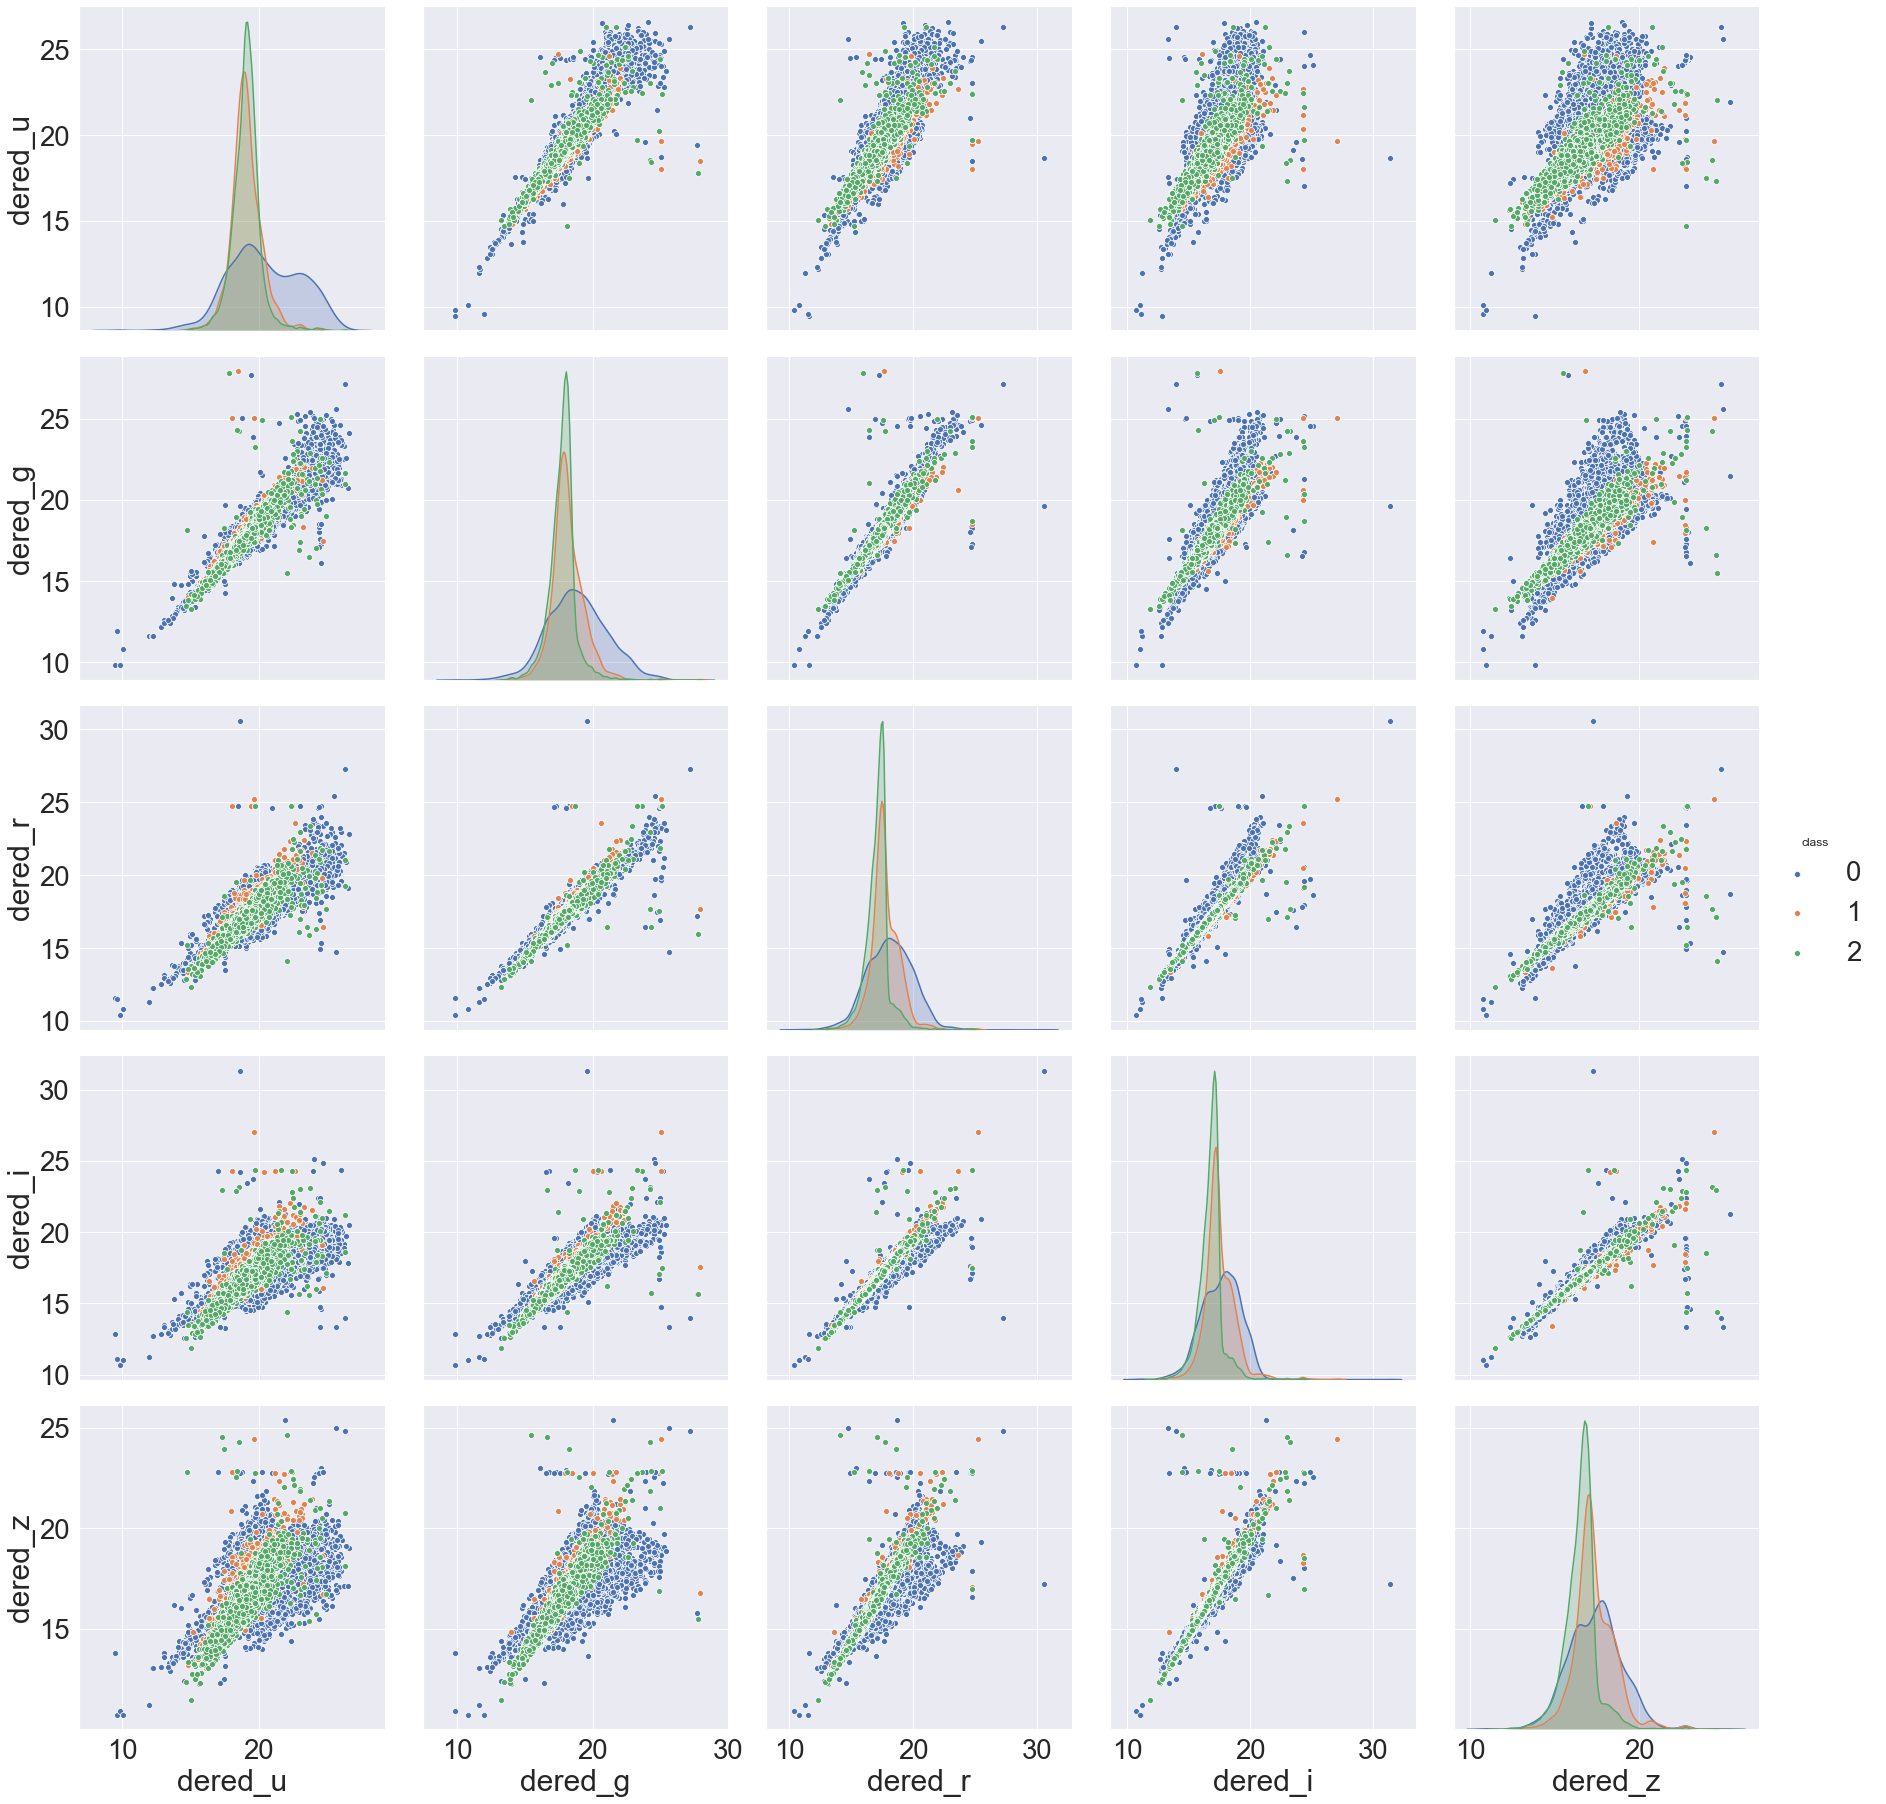

In [11]:
sns.pairplot(data=train_sample, vars=['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue='class', size=5)

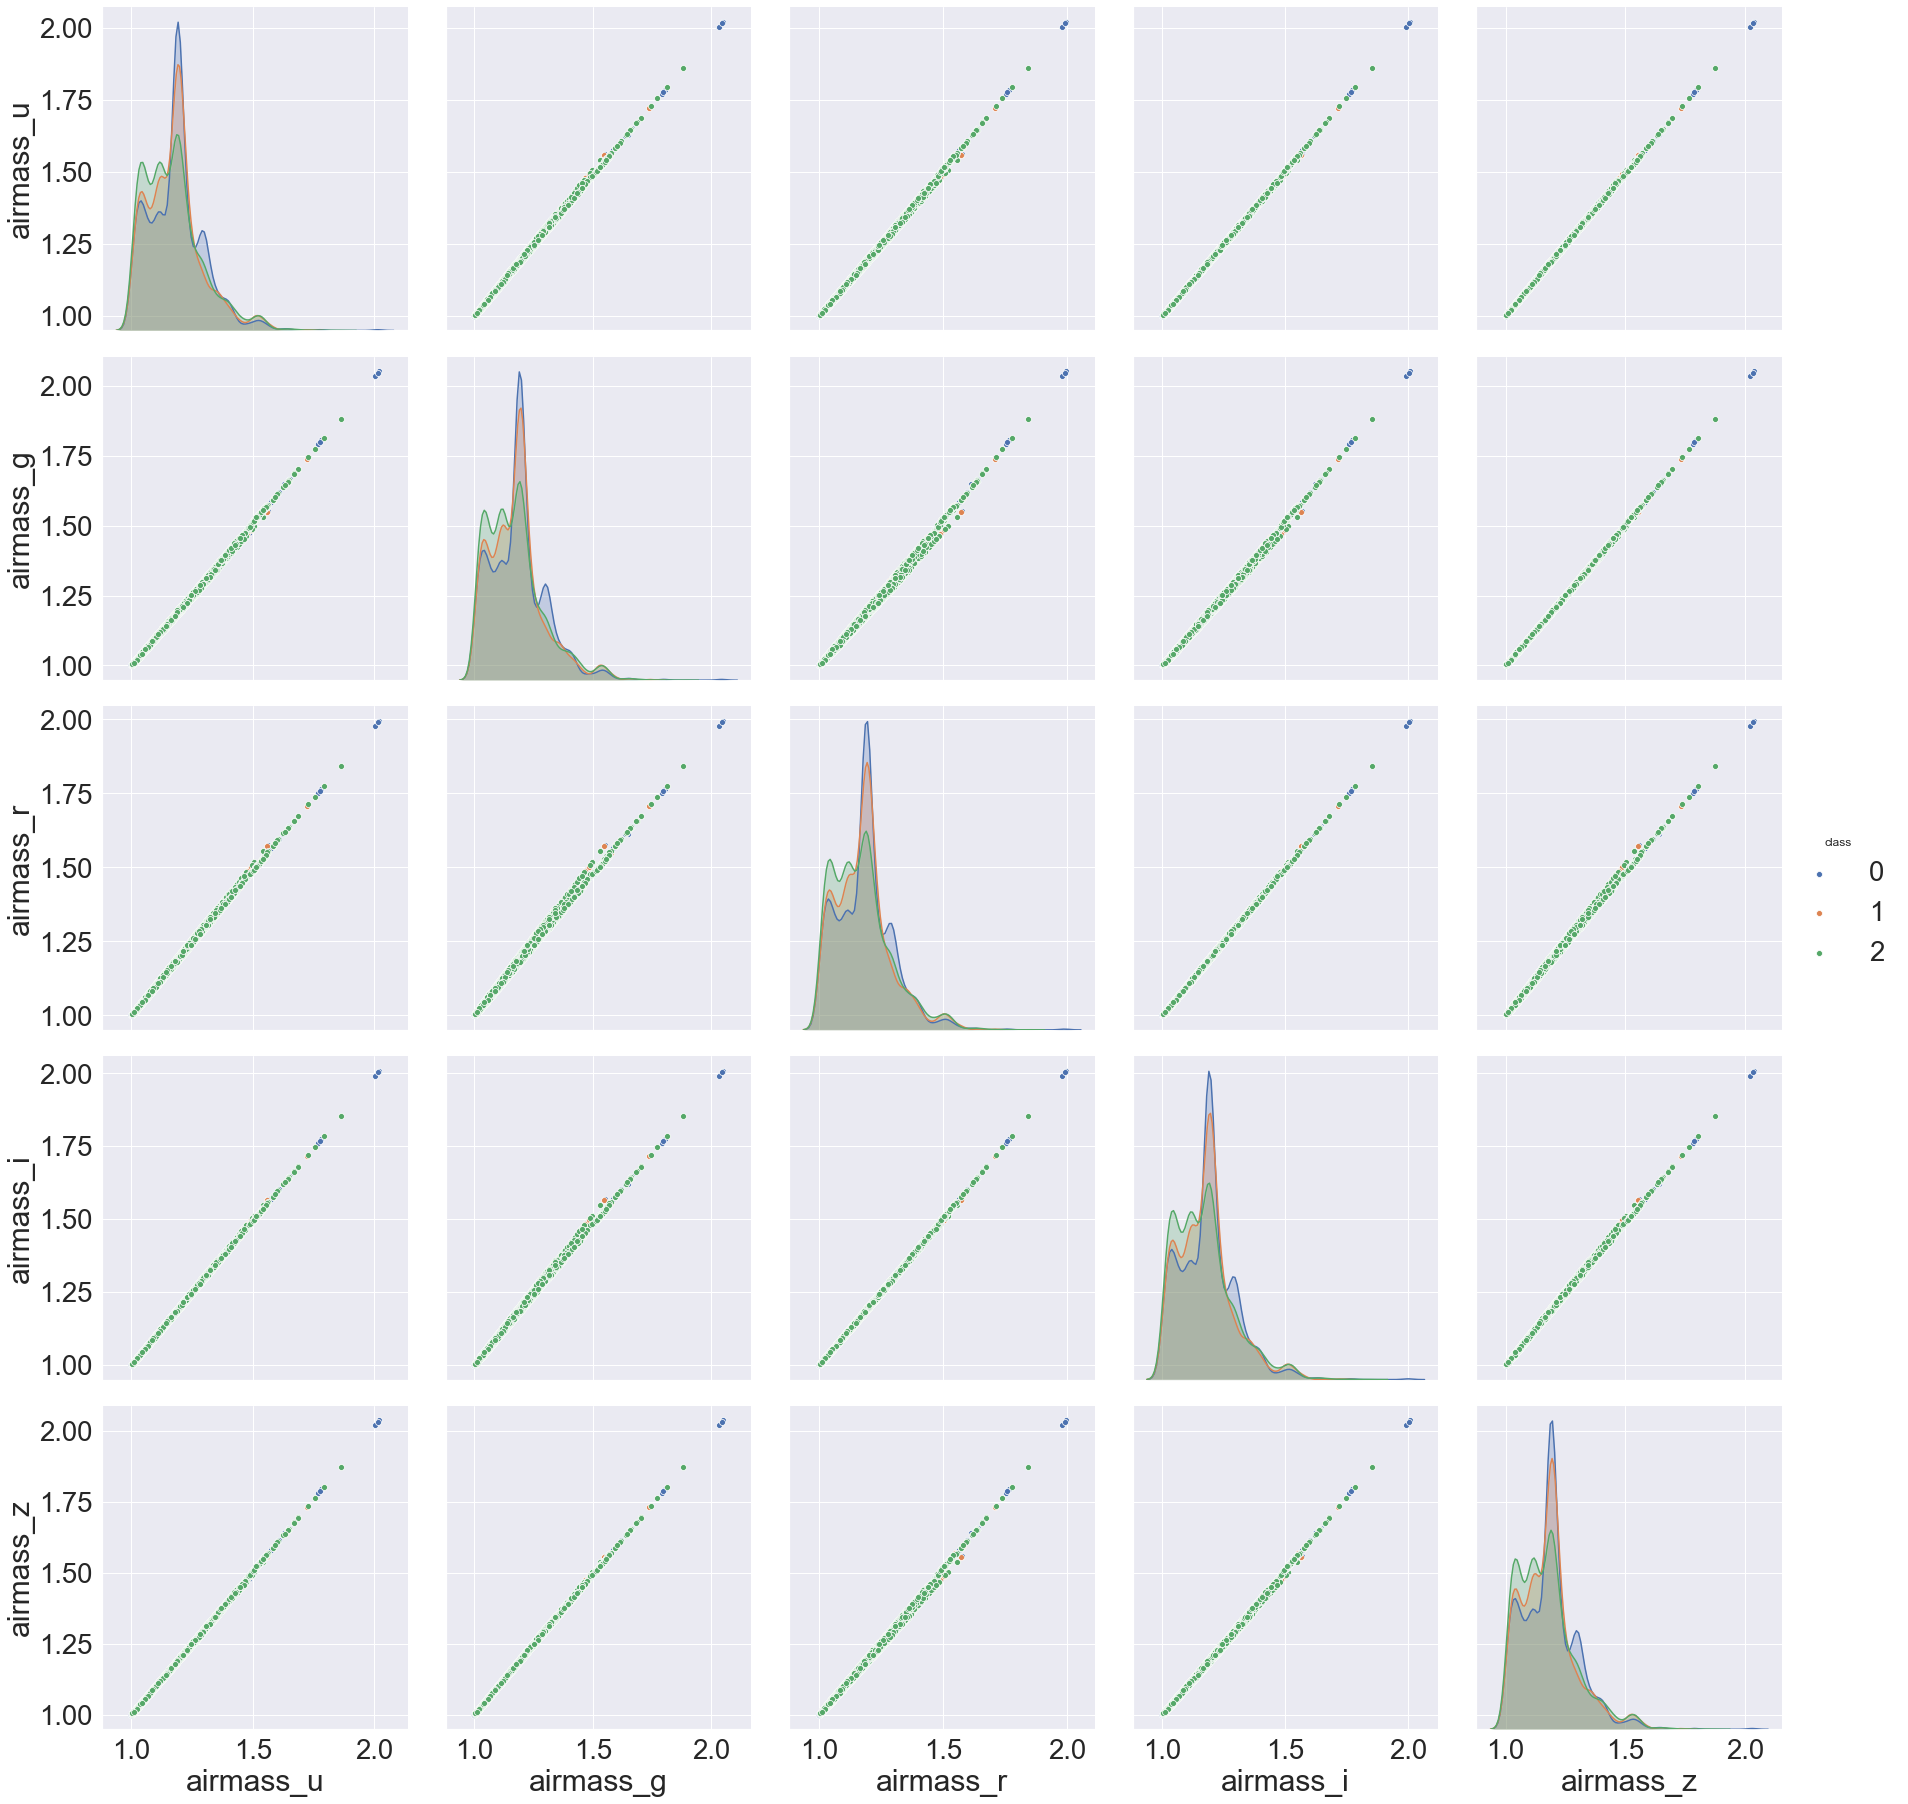

In [12]:
sns.pairplot(data=train_sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)

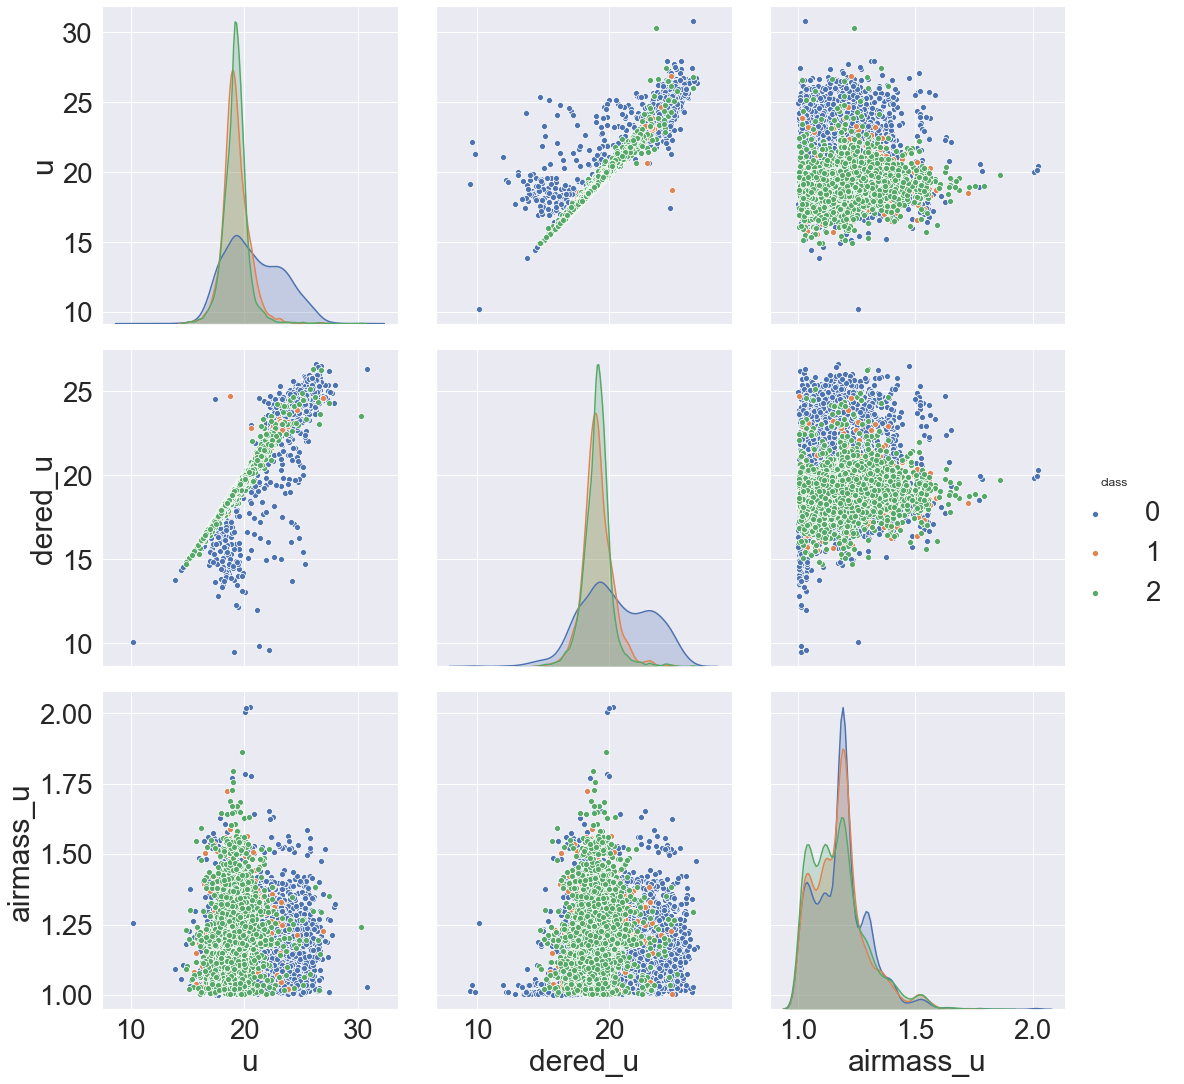

In [13]:
sns.pairplot(data=train_sample, vars=['u', 'dered_u', 'airmass_u'], hue='class', size=5)

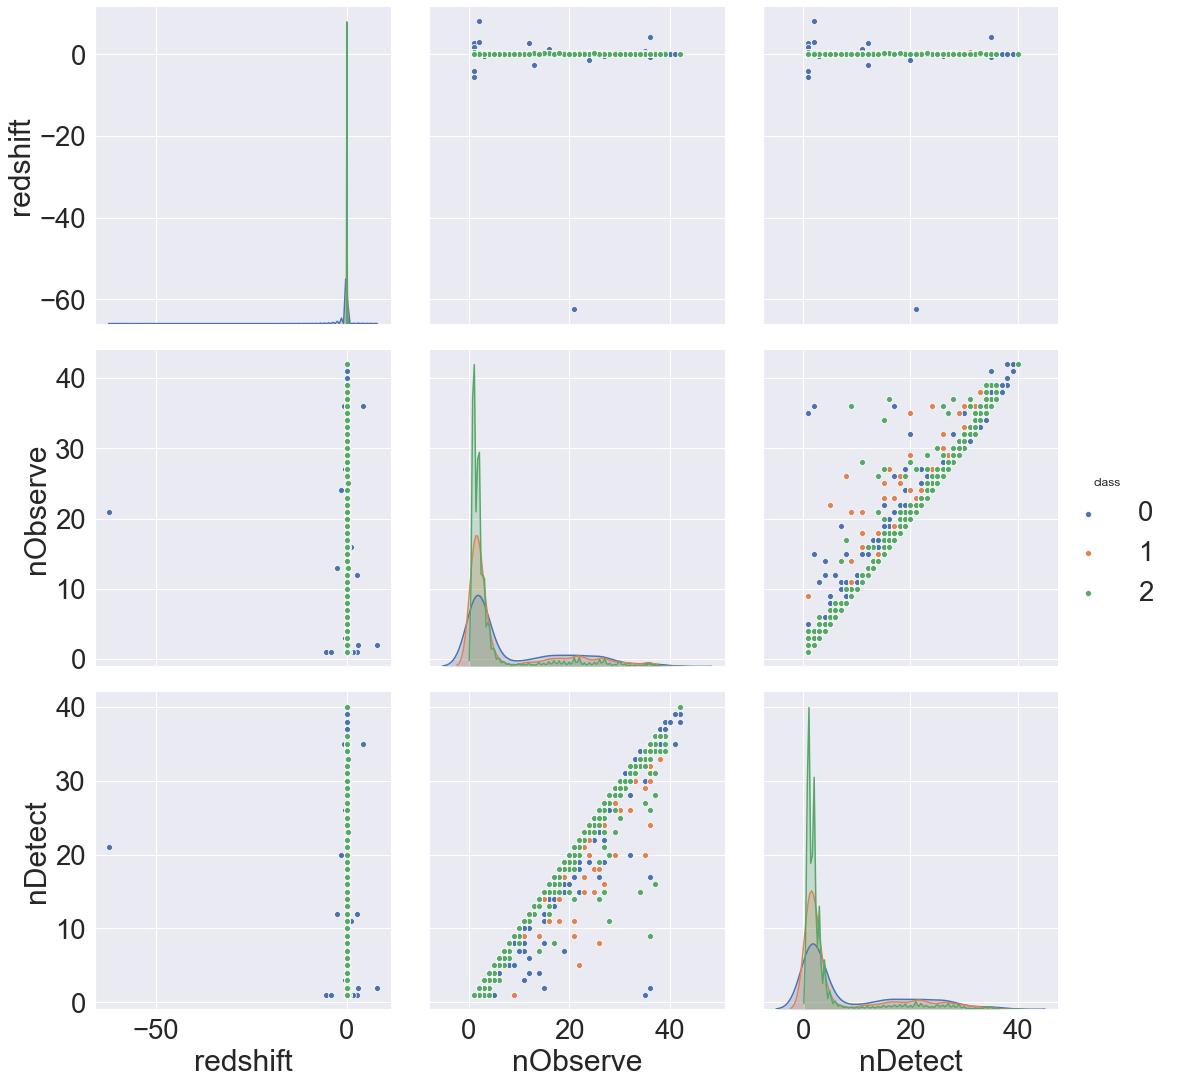

In [14]:
sns.pairplot(data=train_sample, vars=['redshift', 'nObserve', 'nDetect'], hue='class', size=5)

In [15]:
df_train.groupby('class').mean()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
class,,,,,,,,,,,,,,,,,,
0,20.8648,19.2129,18.3938,17.8377,17.5528,-0.0024,20.5223,18.9474,18.2100,17.7011,17.4511,8.5553,8.3138,1.1864,1.1873,1.1856,1.1860,1.1868
1,19.2710,17.8776,17.8412,17.1333,17.0058,0.1055,19.1071,17.9267,17.7526,17.2447,17.1343,7.0451,6.7588,1.1776,1.1784,1.1770,1.1773,1.1780
2,19.2380,17.8746,17.2048,16.6790,16.3225,0.0918,19.0890,17.7590,17.1243,16.7084,16.3531,4.4425,4.3101,1.1671,1.1678,1.1666,1.1669,1.1674


<AxesSubplot:>

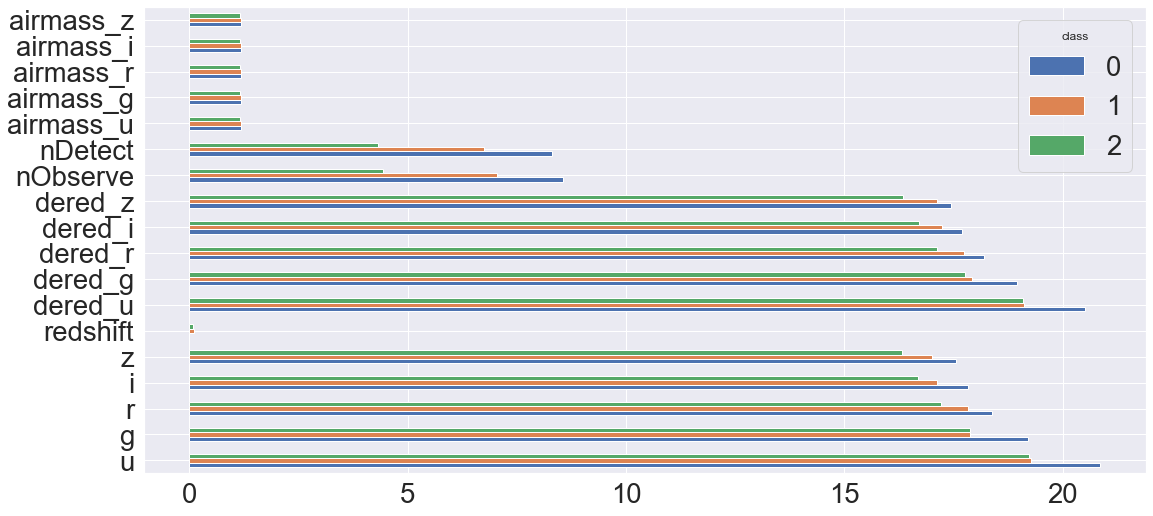

In [16]:
df_train.groupby('class').mean().T.plot(kind='barh')

# Feature enginnering

## 학습/테스트 데이터 결합

In [17]:
dataset = pd.concat([df_train,df_test], axis=0)
df_train_len = len(df_train)

dataset.fillna(-1, inplace=True)
dataset.tail()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-0.0003,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,-1.0
399996,21.5229,20.7283,20.6087,21.0049,20.8458,0.0655,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,-1.0
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-0.0008,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,-1.0
399998,18.8997,17.6009,17.1329,16.8223,16.5946,0.0428,18.7715,17.4880,17.0557,16.7660,16.5585,17,17,1.1804,1.1813,1.1797,1.1800,1.1809,-1.0
399999,20.7587,20.4252,20.5362,20.7729,20.9698,0.0003,20.4958,20.2181,20.3939,20.6696,20.9085,5,5,1.1832,1.1775,1.1889,1.1860,1.1803,-1.0


## Feature 변환

<AxesSubplot:>

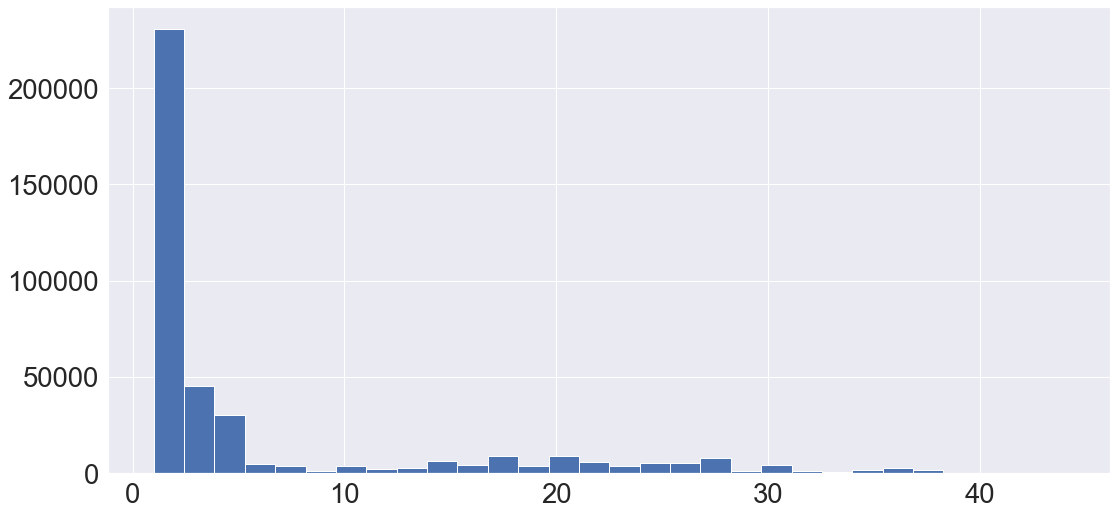

In [18]:
dataset['nObserve'].hist(bins=30)

In [19]:
dataset['nObserve'] = dataset['nObserve'].apply(np.log1p)

<AxesSubplot:>

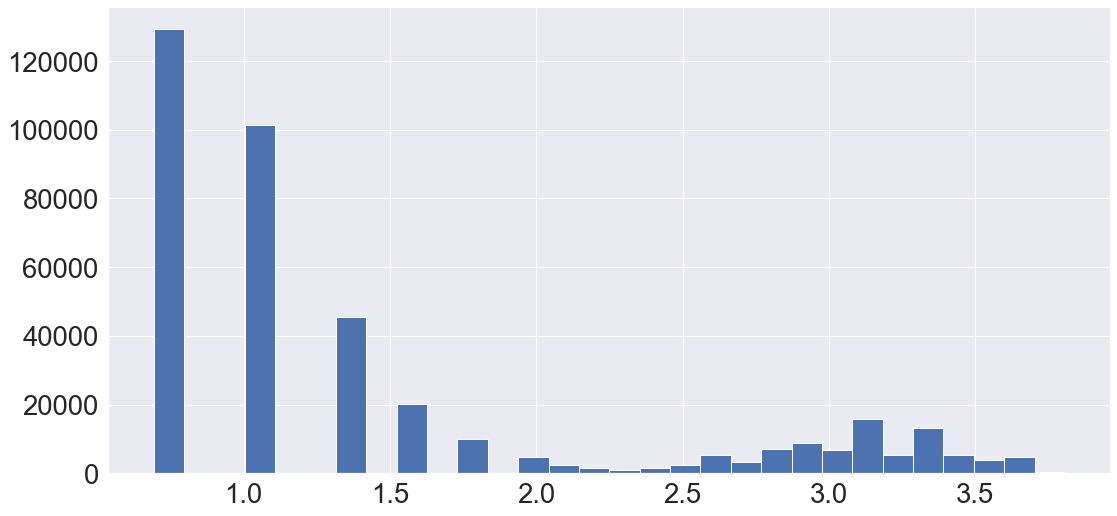

In [20]:
dataset['nObserve'].hist(bins=30)

## Feature 생성

In [21]:
dataset['d_dered_u'] = dataset['dered_u'] - dataset['u']
dataset['d_dered_g'] = dataset['dered_g'] - dataset['g']
dataset['d_dered_r'] = dataset['dered_r'] - dataset['r']
dataset['d_dered_i'] = dataset['dered_i'] - dataset['i']
dataset['d_dered_z'] = dataset['dered_z'] - dataset['z']
dataset['d_dered_rg'] = dataset['dered_r'] - dataset['dered_g']
dataset['d_dered_ig'] = dataset['dered_i'] - dataset['dered_g']
dataset['d_dered_zg'] = dataset['dered_z'] - dataset['dered_g']
dataset['d_dered_ri'] = dataset['dered_r'] - dataset['dered_i']
dataset['d_dered_rz'] = dataset['dered_r'] - dataset['dered_z']
dataset['d_dered_iz'] = dataset['dered_i'] - dataset['dered_z']
dataset['d_obs_det'] = dataset['nObserve'] - dataset['nDetect']
print(dataset.shape)
dataset.head()

(400000, 31)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,18,1.1898,1.1907,1.1890,1.1894,1.1902,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-1.3027,-2.6257,-3.3488,1.3230,2.0462,0.7232,-15.0556
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1,1.2533,1.2578,1.2488,1.2510,1.2555,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.5931,-0.7683,-0.8698,0.1751,0.2767,0.1016,-0.3069
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,2,1.0225,1.0241,1.0210,1.0217,1.0233,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.2466,-0.3649,-0.3905,0.1183,0.1440,0.0257,-0.9014
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,3,1.2054,1.2061,1.2049,1.2051,1.2057,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-0.9074,-1.2000,-1.4395,0.2926,0.5321,0.2395,-1.3906
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,12,1.1939,1.1943,1.1937,1.1938,1.1941,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-1.5709,-2.2436,-2.5579,0.6727,0.9871,0.3144,-9.3609


## Feature 삭제

In [22]:
dataset.corr().style.background_gradient()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
u,1.0000,0.0543,0.8159,0.0194,0.0145,-0.0085,0.9347,0.0904,0.7810,0.0389,0.0231,0.2398,0.2211,0.0768,0.0765,0.0769,0.0768,0.0767,-0.2378,-0.2140,-0.0061,-0.1284,-0.0016,0.0016,-0.0182,-0.0357,-0.0196,0.0124,0.0094,0.0020,-0.2174
g,0.0543,1.0000,0.0556,0.5913,0.5315,-0.0003,0.0525,0.9987,0.0538,0.7074,0.4478,0.0130,0.0127,0.0027,0.0027,0.0028,0.0027,0.0027,-0.0142,-0.0069,-0.9977,-0.0063,-0.4753,-0.3233,-0.9986,-0.0021,-0.0011,-0.7049,-0.4458,0.0001,-0.0126
r,0.8159,0.0556,1.0000,0.0256,0.0199,-0.0055,0.8037,0.0953,0.9684,0.0530,0.0330,0.2171,0.1954,0.0772,0.0768,0.0774,0.0773,0.0770,-0.2346,-0.0620,-0.0025,-0.1127,-0.0005,0.0036,-0.0057,-0.0207,-0.0110,0.0106,0.0073,0.0007,-0.1915
i,0.0194,0.5913,0.0256,1.0000,0.8991,-0.0001,0.0195,0.5901,0.0252,0.9878,0.6254,0.0054,0.0061,-0.0002,-0.0003,-0.0001,-0.0002,-0.0002,-0.0079,-0.0005,-0.5904,-0.0010,-0.9903,-0.6738,-0.5907,0.8047,0.4028,-0.9876,-0.6247,0.0000,-0.0061
z,0.0145,0.5315,0.0199,0.8991,1.0000,-0.0002,0.0144,0.5303,0.0196,0.8881,0.7096,0.0042,0.0053,-0.0002,-0.0002,-0.0001,-0.0002,-0.0002,-0.0083,-0.0009,-0.5309,-0.0007,-0.8904,-0.7360,-0.5311,0.7237,0.5270,-0.8881,-0.7092,-0.1904,-0.0054
redshift,-0.0085,-0.0003,-0.0055,-0.0001,-0.0002,1.0000,-0.0080,-0.0002,-0.0028,-0.0001,-0.0001,-0.0092,-0.0067,0.0011,0.0011,0.0011,0.0011,0.0011,0.0484,0.0016,0.0005,0.0106,0.0002,0.0001,-0.0001,0.0001,-0.0000,-0.0001,-0.0000,0.0001,0.0064
dered_u,0.9347,0.0525,0.8037,0.0195,0.0144,-0.0080,1.0000,0.0969,0.8392,0.0423,0.0249,0.2337,0.2172,0.0889,0.0885,0.0892,0.0891,0.0887,-0.2120,0.1470,0.0068,0.1521,0.0013,0.0036,-0.0194,-0.0374,-0.0209,0.0128,0.0100,0.0025,-0.2138
dered_g,0.0904,0.9987,0.0953,0.5901,0.5303,-0.0002,0.0969,1.0000,0.0990,0.7072,0.4476,0.0222,0.0212,0.0071,0.0070,0.0072,0.0071,0.0070,-0.0219,0.0149,-0.9928,0.0158,-0.4733,-0.3218,-0.9957,-0.0037,-0.0020,-0.7018,-0.4437,0.0002,-0.0209
dered_r,0.7810,0.0538,0.9684,0.0252,0.0196,-0.0028,0.8392,0.0990,1.0000,0.0549,0.0340,0.2100,0.1899,0.0848,0.0843,0.0852,0.0850,0.0845,-0.2139,0.1329,0.0065,0.1388,0.0018,0.0048,-0.0065,-0.0217,-0.0117,0.0108,0.0076,0.0010,-0.1863
dered_i,0.0389,0.7074,0.0530,0.9878,0.8881,-0.0001,0.0423,0.7072,0.0549,1.0000,0.6331,0.0118,0.0119,0.0026,0.0026,0.0027,0.0027,0.0026,-0.0136,0.0080,-0.7048,0.0082,-0.9566,-0.6508,-0.7056,0.7044,0.3526,-0.9978,-0.6312,0.0000,-0.0119


In [23]:
dataset.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect'], 
        axis=1, inplace=True)
print(dataset.shape)
dataset.head()

(400000, 22)


,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-1.3027,-2.6257,-3.3488,1.3230,2.0462,0.7232,-15.0556
1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.5931,-0.7683,-0.8698,0.1751,0.2767,0.1016,-0.3069
2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.2466,-0.3649,-0.3905,0.1183,0.1440,0.0257,-0.9014
3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-0.9074,-1.2000,-1.4395,0.2926,0.5321,0.2395,-1.3906
4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-1.5709,-2.2436,-2.5579,0.6727,0.9871,0.3144,-9.3609


In [24]:
dataset.loc[dataset['class'] != -1].corr().style.background_gradient()

,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
z,1.0000,-0.0002,0.0140,0.5428,0.0189,0.9086,0.9190,0.0039,-0.0015,-0.0100,-0.0009,-0.5432,-0.0005,-0.9109,-0.8693,-0.5433,0.7406,0.7466,-0.9085,-0.9186,-0.3906,-0.0053
redshift,-0.0002,1.0000,-0.0076,-0.0002,-0.0030,-0.0001,-0.0002,-0.0100,0.0014,0.0738,0.0049,0.0006,0.0134,0.0002,0.0001,-0.0001,0.0000,-0.0001,-0.0001,0.0001,0.0002,0.0073
dered_u,0.0140,-0.0076,1.0000,0.0869,0.8405,0.0380,0.0232,0.2334,0.0883,-0.3379,0.1494,0.0063,0.1565,0.0011,0.0008,-0.0173,-0.0335,-0.0235,0.0114,0.0117,0.0051,-0.2135
dered_g,0.5428,-0.0002,0.0869,1.0000,0.0887,0.7072,0.5001,0.0197,0.0059,-0.0304,0.0135,-0.9943,0.0144,-0.4739,-0.4702,-0.9966,-0.0030,-0.0021,-0.7028,-0.4966,0.0005,-0.0188
dered_r,0.0189,-0.0030,0.8405,0.0887,1.0000,0.0490,0.0315,0.2101,0.0839,-0.3413,0.1347,0.0059,0.1418,0.0017,0.0013,-0.0059,-0.0196,-0.0150,0.0097,0.0100,0.0045,-0.1863
dered_i,0.9086,-0.0001,0.0380,0.7072,0.0490,1.0000,0.7075,0.0104,0.0018,-0.0183,0.0072,-0.7053,0.0075,-0.9570,-0.9497,-0.7059,0.7049,0.4071,-0.9983,-0.7058,0.0002,-0.0108
dered_z,0.9190,-0.0002,0.0232,0.5001,0.0315,0.7075,1.0000,0.0067,-0.0003,-0.0144,0.0043,-0.4991,0.0044,-0.6772,-0.6040,-0.4994,0.4990,0.8649,-0.7064,-0.9991,-0.7066,-0.0079
nObserve,0.0039,-0.0100,0.2334,0.0197,0.2101,0.0104,0.0067,1.0000,0.2499,-0.2363,-0.0251,-0.0005,-0.0251,0.0006,0.0006,-0.0024,-0.0050,-0.0037,0.0019,0.0020,0.0010,-0.9364
airmass_u,-0.0015,0.0014,0.0883,0.0059,0.0839,0.0018,-0.0003,0.2499,1.0000,-0.0766,0.0306,0.0032,0.0322,0.0030,0.0026,0.0011,-0.0034,-0.0037,0.0032,0.0038,0.0022,-0.2476
class,-0.0100,0.0738,-0.3379,-0.0304,-0.3413,-0.0183,-0.0144,-0.2363,-0.0766,1.0000,0.1262,0.0049,0.1293,0.0026,0.0021,0.0022,0.0047,0.0010,-0.0017,0.0002,0.0021,0.2133


## 데이터셋 분리

In [25]:
from sklearn.model_selection import train_test_split 

# train set
X = dataset.loc[ dataset.index < df_train_len , :]
X.drop(columns='class',inplace=True,axis=1)
y = dataset.loc[ dataset.index < df_train_len, 'class']

# test set
test = dataset.loc[ dataset.index >= df_train_len, :]
test.drop(columns='class', inplace=True,axis=1)

# train set split
SEED = 2020
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = SEED)

# 모델 학습

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error 

## 모델 학습을 위한 헬퍼 함수 생성 

In [27]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

## 모델 생성

In [38]:
# Put in our parameters for said classifiers

# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_features' : 'sqrt',
    'verbose' : 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs' : -1,
    'n_estimators': 100,
    'max_features' : 'sqrt',
    'verbose' : 0
}

# AdaBoost Parameters
ada_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'algorithm': 'SAMME.R'
}

# Gradient Bossting parameters
gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_features': 'sqrt',
    'verbose': 0
}

# Xgboost
xgb_params = {
    'n_jobs' : -1, 
    'n_estimators': 100,
    'eta': 0.3, # learning_rate
    'booster': 'gbtree',
    'gamma': 0,
    'tree_method': 'auto',
    'objective': 'reg:squarederror'
}

In [29]:
# Create model

rf = rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)

et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params )

ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)

gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)

xgb = SklearnHelper(clf=xg.XGBClassifier, seed=SEED, params=xgb_params)

In [30]:
rf.train(X_train,y_train)
p = rf.predict(X_test)
print('accuracy for rf :',accuracy_score(y_test,p))

accuracy for rf : 0.9301666666666667


In [31]:
et.train(X_train,y_train)
p = et.predict(X_test)
print('accuracy for et :', accuracy_score(y_test,p))

accuracy for et : 0.9195


In [32]:
ada.train(X_train,y_train)
p = ada.predict(X_test)
print('accuracy for ada :', accuracy_score(y_test,p))

accuracy for ada : 0.87384375


In [33]:
gb.train(X_train,y_train)
p = gb.predict(X_test)
print('accuracy for gb :', accuracy_score(y_test,p))

accuracy for gb : 0.92028125


In [39]:
xgb.train(X_train,y_train)
p = xgb.predict(X_test)
print('accuracy for xg :', accuracy_score(y_test,p))

accuracy for xg : 0.93196875


## xgboost 파라미터 튜닝

이 부분은 [xgboost 파라미터 튜닝][1]을 참고

[1]: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ 


In [92]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [104]:
# Xgboost
xgb_params = {
    'n_jobs' : -1,
    'eta': 0.1, # learning_rate
    'n_estimators': 100,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0, # min_split_loss
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 1,
    'booster': 'gbtree',
    'tree_method': 'auto',
    'objective': 'reg:squarederror',
    'seed': SEED,
}

param_test1 = {
    'max_depth': range(3,10,2),
    'min_child_weight': range(1,6,2)
}

In [105]:
model = xg.XGBClassifier(xgb_params)

In [108]:
cv=KFold(n_splits=5, random_state=SEED)

gcv1 = GridSearchCV(estimator=model, param_grid=param_test1, scoring='accuracy', n_jobs=-1, cv=cv)

gcv1.fit(X_train, y_train)
gcv1.cv_results_, gcv1.best_params_, gcv1.best_score_

({'mean_fit_time': array([258.98263526, 258.44180322, 260.78636346, 455.13315105,
         451.64834661, 451.85714569, 672.15514522, 681.26846166,
         664.76364713, 858.30801945, 773.44735818, 577.8003531 ]),
  'std_fit_time': array([ 0.64525422,  0.65618227,  2.6548545 ,  1.89350836,  4.37173611,
          2.05344012,  2.7398974 , 10.45043677, 13.72532969,  5.72006394,
         52.17386908, 73.92281853]),
  'mean_score_time': array([0.72310925, 0.74847236, 0.82495756, 1.83527465, 1.86172643,
         1.77737727, 2.34296613, 2.13253293, 2.1763989 , 3.47762713,
         2.21633439, 1.21037612]),
  'std_score_time': array([0.02727025, 0.02355162, 0.08237848, 0.18593132, 0.15899108,
         0.2189919 , 0.03635935, 0.06784342, 0.05760259, 0.38693287,
         0.48903393, 0.23808598]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [109]:
gcv1.best_score_

0.9325044642857143

In [111]:
# 0.933525 정확도 제출 파일이

a = gcv1.best_estimator_
a.fit(X,y)
p = a.predict(test)
submission = pd.read_csv('../input/dankook/sample_submission.csv')
submission['class'] = p
submission.head()

,id,class
0,320000,2.0
1,320001,0.0
2,320002,2.0
3,320003,0.0
4,320004,2.0


In [115]:
submission.to_csv('submission.csv',index=False, encoding='utf-8-sig')
a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
# Xgboost
xgb_params = {
    'n_jobs' : -1,
    'eta': 0.1, # learning_rate
    'n_estimators': 100,
    'max_depth': 9,
    'min_child_weight': 5,
    'gamma': 0, # min_split_loss
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 1,
    'booster': 'gbtree',
    'tree_method': 'auto',
    'objective': 'reg:squarederror',
    'seed': SEED,
}

param_test2 = {
    'subsample': [i/10.0 for i in range(6,10)],
    'colsample_bytree': [i/10.0 for i in range(6,10)]
}

model = xg.XGBClassifier(xgb_params)

In [155]:
cv=KFold(n_splits=5, random_state=SEED)

gcv2 = GridSearchCV(estimator=model, param_grid=param_test2, scoring='accuracy', n_jobs=-1, cv=cv)

gcv2.fit(X_train, y_train)
gcv2.cv_results_, gcv2.best_params_, gcv2.best_score_

({'mean_fit_time': array([255.25618634, 265.35061002, 265.80041728, 270.26019382,
         281.64480605, 297.61618071, 308.35474138, 325.10468359,
         332.77296247, 349.61963425, 374.83970723, 390.52520018,
         407.33093619, 420.04921031, 372.17427578, 315.00310946]),
  'std_fit_time': array([ 0.72956155,  1.550425  ,  4.19992199,  0.65258274,  3.52144078,
          0.6210625 ,  0.57344279,  3.79123186,  1.0933164 ,  7.00064202,
          3.29563872,  2.17864244,  1.39078387,  1.57586256, 48.35039527,
         14.28367902]),
  'mean_score_time': array([1.44421625, 1.44470086, 1.4541275 , 1.47182174, 1.50562663,
         1.58757143, 1.63709235, 1.63816381, 1.65775833, 1.73917284,
         1.92982082, 1.84121451, 1.84975505, 1.83130636, 1.49500666,
         1.01889491]),
  'std_score_time': array([0.03793939, 0.04808509, 0.02211169, 0.02906217, 0.05108186,
         0.04030503, 0.05568499, 0.04438569, 0.02104972, 0.1042349 ,
         0.03763139, 0.0322161 , 0.04737771, 0.1007753

In [158]:
gcv2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
# Xgboost
xgb_params = {
    'n_jobs' : -1,
    'eta': 0.1, # learning_rate
    'n_estimators': 100,
    'max_depth': 9,
    'min_child_weight': 5,
    'gamma': 0, # min_split_loss
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 1,
    'booster': 'gbtree',
    'tree_method': 'auto',
    'objective': 'reg:squarederror',
    'seed': SEED,
}


param_test3 = {
    'subsample': [i/100.0 for i in range(85,100,5)],
    'colsample_bytree': [i/100.0 for i in range(85,100,5)]
}

model = xg.XGBClassifier(xgb_params)

In [160]:
cv=KFold(n_splits=5, random_state=SEED)

gcv3 = GridSearchCV(estimator=model, param_grid=param_test3, scoring='accuracy', n_jobs=-1, cv=cv)

gcv3.fit(X_train, y_train)
gcv3.cv_results_, gcv3.best_params_, gcv3.best_score_

({'mean_fit_time': array([390.59912839, 395.5128644 , 399.15070114, 406.09621358,
         409.63133063, 410.11975598, 418.30650868, 347.45368314,
         324.40534   ]),
  'std_fit_time': array([ 2.14587901,  0.94628067,  3.13745936,  3.2318888 ,  1.51396457,
          1.53660488,  3.16321675, 39.27544874,  3.51518482]),
  'mean_score_time': array([1.64004154, 1.60955129, 1.65009012, 1.65228376, 1.64367108,
         1.61146216, 1.65525522, 1.40093703, 1.0487864 ]),
  'std_score_time': array([0.01948666, 0.0170311 , 0.03681421, 0.0180865 , 0.04794712,
         0.019058  , 0.04253588, 0.0537858 , 0.10569284]),
  'param_colsample_bytree': masked_array(data=[0.85, 0.85, 0.85, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.95, 0.85, 0.9, 0.95, 0.85, 0.9, 0.95],
               mask=[False, Fal

In [161]:
gcv3.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.85,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
# Xgboost
xgb_params = {
    'n_jobs' : -1,
    'eta': 0.1, # learning_rate
    'n_estimators': 100,
    'max_depth': 9,
    'min_child_weight': 5,
    'gamma': 0, # min_split_loss
    'subsample': 0.85,
    'colsample_bytree': 0.85,
    'scale_pos_weight': 1,
    'booster': 'gbtree',
    'tree_method': 'auto',
    'objective': 'reg:squarederror',
    'seed': SEED,
}


param_test4 = {
     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

model = xg.XGBClassifier(xgb_params)

In [165]:
cv=KFold(n_splits=5, random_state=SEED)

gcv4 = GridSearchCV(estimator=model, param_grid=param_test4, scoring='accuracy', n_jobs=-1, cv=cv)

gcv4.fit(X_train, y_train)
gcv4.cv_results_, gcv4.best_params_, gcv4.best_score_

({'mean_fit_time': array([533.66509552, 534.46542563, 519.0212204 , 511.53562932,
         366.74743891]),
  'std_fit_time': array([ 2.49301536,  2.6929961 , 12.58537578,  1.5964332 , 90.38495411]),
  'mean_score_time': array([1.83614774, 1.97871189, 1.60098405, 1.52363486, 1.00442328]),
  'std_score_time': array([0.15882642, 0.12247119, 0.23365988, 0.23307286, 0.29194841]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.93120536, 0.93129464, 0.93198661, 0.93138393, 0.92819196]),
  'split1_test_score': array([0.93198661, 0.93258929, 0.93151786, 0.93216518, 0.92837054]),
  'split2_test_score': array([0.93136161, 0.93209821, 0.93227679, 0.93267857, 0.92904018]),
  'split3_test_score': array([0.93301339,

In [166]:
gcv4.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.1,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
# Xgboost
xgb_params = {
    'n_jobs' : -1,
    'eta': 0.1, # learning_rate
    'n_estimators': 100,
    'max_depth': 9,
    'min_child_weight': 5,
    'gamma': 0, # min_split_loss
    'subsample': 0.85,
    'colsample_bytree': 0.85,
    'scale_pos_weight': 1,
    'booster': 'gbtree',
    'tree_method': 'auto',
    'objective': 'reg:squarederror',
    'seed': SEED,
}


param_test5 = {
     'reg_alpha':[0,0.01,0.05,0.1,0.5]
}

model = xg.XGBClassifier(xgb_params)

In [171]:
cv=KFold(n_splits=5, random_state=SEED)

gcv5 = GridSearchCV(estimator=model, param_grid=param_test5, scoring='accuracy', n_jobs=-1, cv=cv)

gcv5.fit(X_train, y_train)
gcv5.cv_results_, gcv5.best_params_, gcv5.best_score_

({'mean_fit_time': array([521.0851584 , 525.03855739, 535.57421885, 546.65392494,
         468.7031826 ]),
  'std_fit_time': array([  2.34303945,   1.96178943,  11.14493818,   5.01871732,
         154.69140295]),
  'mean_score_time': array([2.14410081, 1.93919816, 1.87751765, 1.56480093, 1.34111538]),
  'std_score_time': array([0.1464904 , 0.05154417, 0.16834614, 0.27243052, 0.41224756]),
  'param_reg_alpha': masked_array(data=[0, 0.01, 0.05, 0.1, 0.5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.05},
   {'reg_alpha': 0.1},
   {'reg_alpha': 0.5}],
  'split0_test_score': array([0.93120536, 0.93129464, 0.93216518, 0.93198661, 0.93189732]),
  'split1_test_score': array([0.93198661, 0.93258929, 0.93205357, 0.93151786, 0.93198661]),
  'split2_test_score': array([0.93136161, 0.93209821, 0.93225446, 0.93227679, 0.93131696]),
  'split3_test_score': array(

In [194]:
# Xgboost
xgb_params_final = {
    'n_jobs' : -1,
    'eta': 0.1, # learning_rate
    'n_estimators': 100,
    'max_depth': 9,
    'min_child_weight': 5,
    'gamma': 0, # min_split_loss
    'subsample': 0.85,
    'colsample_bytree': 0.85,
    'reg_alpha': 0.1,
    'scale_pos_weight': None,
    'booster': 'gbtree',
    'tree_method': 'auto',
    'objective': 'reg:squarederror',
    'seed': SEED,
}

final_model = xg.XGBClassifier(n_jobs=-1, eta=0.1, n_estimators=100, max_depth=9, min_child_weight=5, gamma=0, subsample=0.85, colsample_bytree=0.85, reg_alpha=0.1, scale_pos_weight=None, booster='gbtree', tree_method='auto', objective='reg:squarederror', seed=SEED)
final_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.85,
 'gamma': 0,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': 9,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 0.1,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': 0.85,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.1,
 'seed': 2020}

In [195]:
final_model.fit(X_train,y_train)
p = final_model.predict(X_test)
print('accuracy for ada :', accuracy_score(y_test,p))

accuracy for ada : 0.93228125


In [196]:
model.get_params()

{'objective': 'multi:softprob',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [197]:
p = final_model.predict(test)
submission = pd.read_csv('../input/dankook/sample_submission.csv')
submission['class'] = p
submission.head()
submission.to_csv('submission.csv',index=False, encoding='utf-8-sig')